In [30]:
# installing

!pip install -q imbalanced-learn

### Over sampling

#### Random

In [31]:
# making the dataset

from sklearn.datasets import make_classification

X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)
X.shape, y.shape

((5000, 2), (5000,))

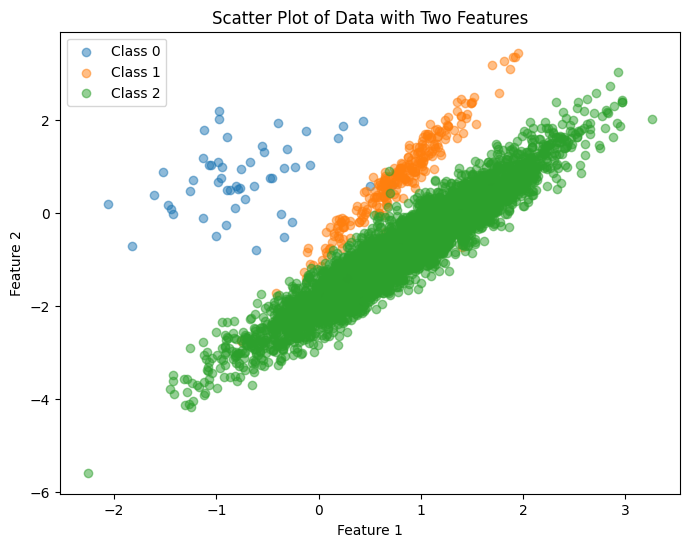

In [32]:
# plotting

import matplotlib.pyplot as plt
import numpy as np

def plot(X, y):
  plt.figure(figsize=(8, 6))
  colors = ["red", "green", "blue"]

  for i, class_label in enumerate(np.unique(y)):
      indices = np.where(y == class_label)
      plt.scatter(X[indices, 0], X[indices, 1], label=f'Class {class_label}', alpha=0.5)

  plt.title('Scatter Plot of Data with Two Features')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.legend()
  plt.show()

plot(X, y)

In [33]:
# counting each elements
from collections import Counter

print(sorted(Counter(y).items()))

[(0, 64), (1, 262), (2, 4674)]


In [34]:
# applying the oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
X_resampled.shape, y_resampled.shape

((14022, 2), (14022,))

In [35]:
# counting each elements
from collections import Counter

print(sorted(Counter(y_resampled).items()))

[(0, 4674), (1, 4674), (2, 4674)]


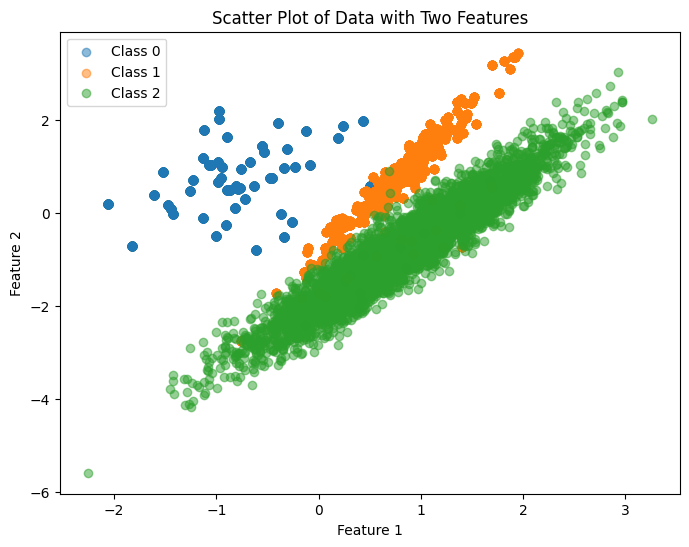

In [36]:
# plotting

plot(X_resampled, y_resampled)

#### SMOTE

In [37]:
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [38]:
# counting each elements
from collections import Counter

print(sorted(Counter(y_resampled).items()))

[(0, 4674), (1, 4674), (2, 4674)]


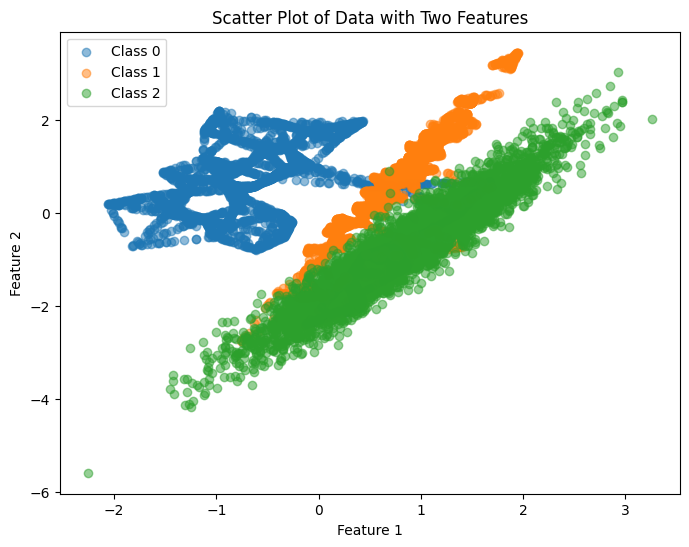

In [39]:
# plotting

plot(X_resampled, y_resampled)

#### ADASYN

In [40]:
from imblearn.over_sampling import ADASYN

X_resampled, y_resampled = ADASYN().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 4673), (1, 4662), (2, 4674)]


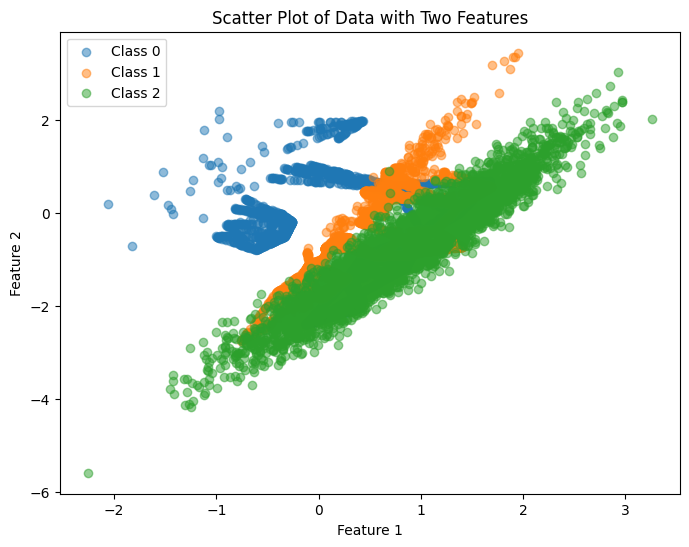

In [41]:
# plotting

plot(X_resampled, y_resampled)

### Under sampling

In [42]:
# random

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

print(sorted(Counter(y_resampled).items()))

[(0, 64), (1, 64), (2, 64)]


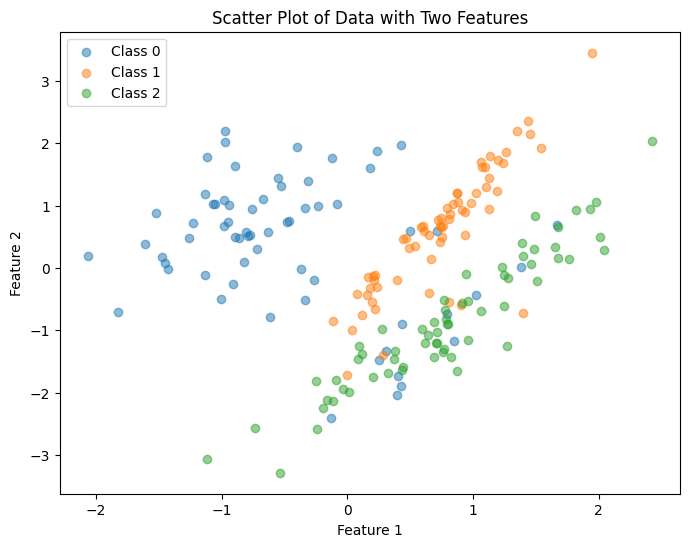

In [43]:
# plotting

plot(X_resampled, y_resampled)

### Combination

In [44]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 4060), (1, 4381), (2, 3502)]


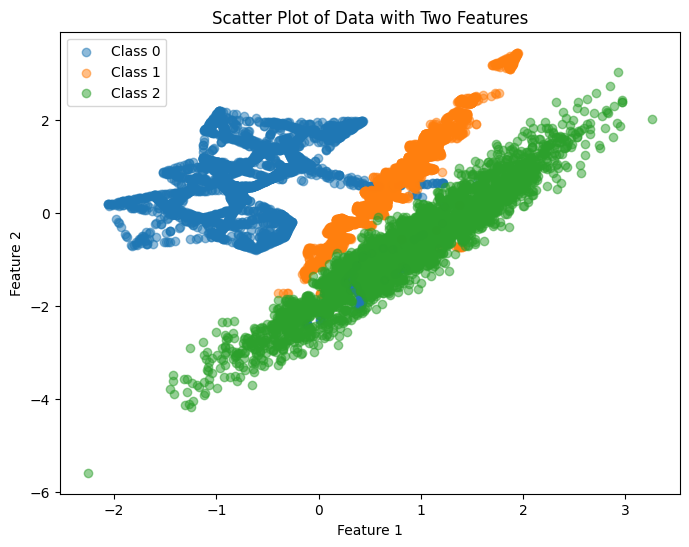

In [45]:
plot(X_resampled, y_resampled)

### Ensemble of sample

In [46]:
# getting the data

from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94], class_sep=0.8,
                           random_state=0)
X, y

(array([[-1.17193225,  0.92171218],
        [-0.83031743,  1.19351593],
        [-2.16240487, -2.36749441],
        ...,
        [-1.43646214, -0.9010522 ],
        [ 1.17004811, -0.15316994],
        [-0.88490082,  0.87375556]]),
 array([2, 2, 2, ..., 2, 1, 2]))

In [47]:
# normal classifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
bc = BaggingClassifier(DecisionTreeClassifier(), random_state=0)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)

balanced_accuracy_score(y_test, y_pred)

0.7739629664028289

In [48]:
# balanced ensemble

from imblearn.ensemble import BalancedBaggingClassifier
bbc = BalancedBaggingClassifier(DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
bbc.fit(X_train, y_train)
y_pred = bbc.predict(X_test)

balanced_accuracy_score(y_test, y_pred)

0.8251353587264241

That's ittt , thanks